# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rantauprapat
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | el porvenir
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | jabat
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | pirane
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | island harbour
Processing Record 16 of Set 1 | nkurenkuru
City not found. Skipping...
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | zdvinsk
Processing Record 20 of Set 1 | peterhead
Processing Record 21 of Set 1 | springs
Processing Record 22 of Set 1 | xilin h

Processing Record 38 of Set 4 | north bend
Processing Record 39 of Set 4 | cozumel
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | afaahiti
Processing Record 42 of Set 4 | cova figueira
Processing Record 43 of Set 4 | qaqortoq
Processing Record 44 of Set 4 | indianola
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | nishinoomote
Processing Record 48 of Set 4 | wanning
Processing Record 49 of Set 4 | kill devil hills
Processing Record 0 of Set 5 | igarka
Processing Record 1 of Set 5 | warwick
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | utrik
Processing Record 4 of Set 5 | mount isa
Processing Record 5 of Set 5 | ust-nera
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | cidade velha
Processing Record 8 of Set 5 | sinop
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | la sierpe
Processing Record 11 of Set 5 | sumbe


City not found. Skipping...
Processing Record 29 of Set 8 | rabo de peixe
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | mata-utu
Processing Record 32 of Set 8 | sangkhla buri
Processing Record 33 of Set 8 | katsuren-haebaru
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | okha
Processing Record 36 of Set 8 | nefta
Processing Record 37 of Set 8 | codajas
Processing Record 38 of Set 8 | tome acu
Processing Record 39 of Set 8 | maintirano
Processing Record 40 of Set 8 | mitu
Processing Record 41 of Set 8 | oltinko'l
Processing Record 42 of Set 8 | ma'rib
Processing Record 43 of Set 8 | chibougamau
Processing Record 44 of Set 8 | barreirinha
Processing Record 45 of Set 8 | fort saskatchewan
Processing Record 46 of Set 8 | port douglas
Processing Record 47 of Set 8 | tateyama
Processing Record 48 of Set 8 | lake city
Processing Record 49 of Set 8 | kone
Processing Record 0 of Set 9 | amlapura
Processing Record 1 of Set 9 | san juan de ura

Processing Record 19 of Set 12 | roma
Processing Record 20 of Set 12 | cono norte
Processing Record 21 of Set 12 | mishkovo-pohorilove
Processing Record 22 of Set 12 | ranchettes
Processing Record 23 of Set 12 | bel ombre
Processing Record 24 of Set 12 | magadan
Processing Record 25 of Set 12 | quibdo
Processing Record 26 of Set 12 | hayma'
City not found. Skipping...
Processing Record 27 of Set 12 | gebeit
Processing Record 28 of Set 12 | new norfolk
Processing Record 29 of Set 12 | muisne
Processing Record 30 of Set 12 | motueka
Processing Record 31 of Set 12 | songwa
Processing Record 32 of Set 12 | pitkyaranta
Processing Record 33 of Set 12 | ati
Processing Record 34 of Set 12 | brak
Processing Record 35 of Set 12 | taoudenni
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rantauprapat,2.1000,99.8333,33.83,49,80,0.94,ID,1690448719
1,invercargill,-46.4000,168.3500,7.32,83,98,2.82,NZ,1690448719
2,el porvenir,13.7617,-87.3458,20.63,81,100,2.61,HN,1690448719
3,walvis bay,-22.9575,14.5053,12.83,63,0,0.91,NA,1690448670
4,port-aux-francais,-49.3500,70.2167,4.95,89,71,17.17,TF,1690448720


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.18,69,100,2.12,AU,1690427982
1,lompoc,34.6391,-120.4579,20.08,87,100,5.36,US,1690427813
2,saint-joseph,-21.3667,55.6167,18.21,81,79,4.21,RE,1690427983
3,san antonio de pale,-1.4014,5.6325,22.84,90,100,5.08,GQ,1690427983
4,waitangi,-43.9535,-176.5597,8.23,90,88,0.45,NZ,1690427984


In [60]:
city_data_df["Humidity"].describe()

count    579.000000
mean      70.778929
std       21.151362
min        9.000000
25%       58.000000
50%       77.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [61]:
humidity_101 = city_data_df[(city_data_df["Humidity"] > 100)].index
humidity_101

Int64Index([], dtype='int64', name='City_ID')

In [63]:
clean_city_data= city_data_df.drop(humidity_101, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.18,69,100,2.12,AU,1690427982
1,lompoc,34.6391,-120.4579,20.08,87,100,5.36,US,1690427813
2,saint-joseph,-21.3667,55.6167,18.21,81,79,4.21,RE,1690427983
3,san antonio de pale,-1.4014,5.6325,22.84,90,100,5.08,GQ,1690427983
4,waitangi,-43.9535,-176.5597,8.23,90,88,0.45,NZ,1690427984


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

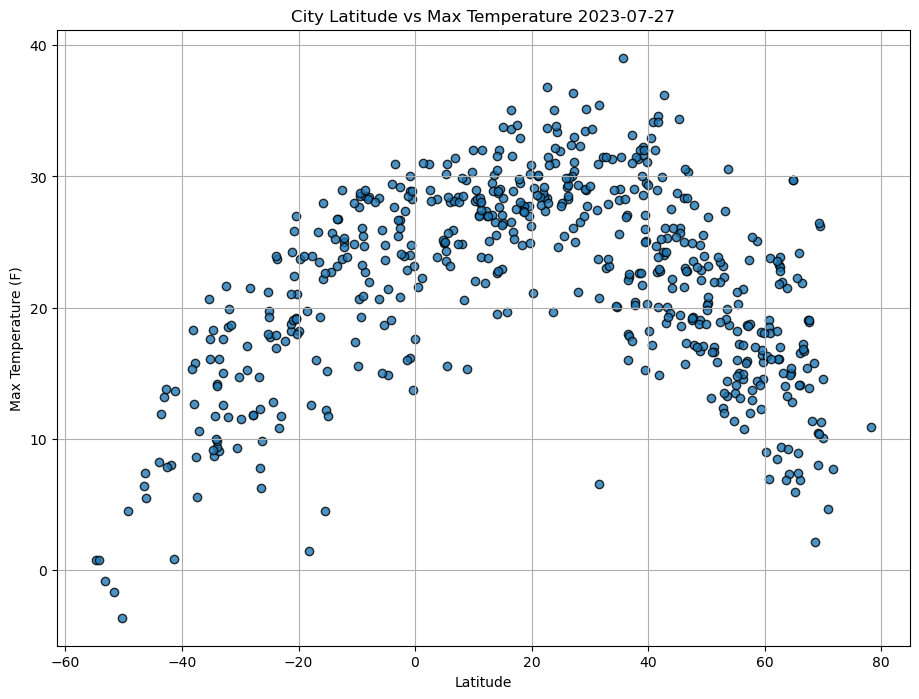

In [16]:
date_now = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_max_temp.png", bbox_inches="tight")
plt.show()

#### Latitude Vs. Humidity

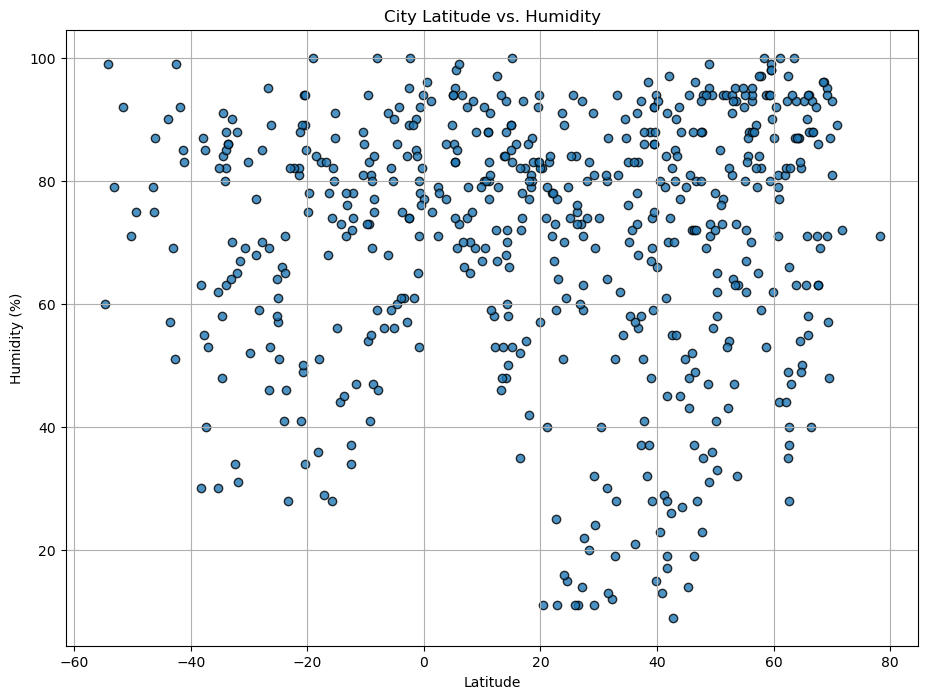

In [41]:
import matplotlib.pyplot as plt


# Create scatter plot for latitude vs. humidity
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

fig, ax = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")

# Show the plot
plt.show()


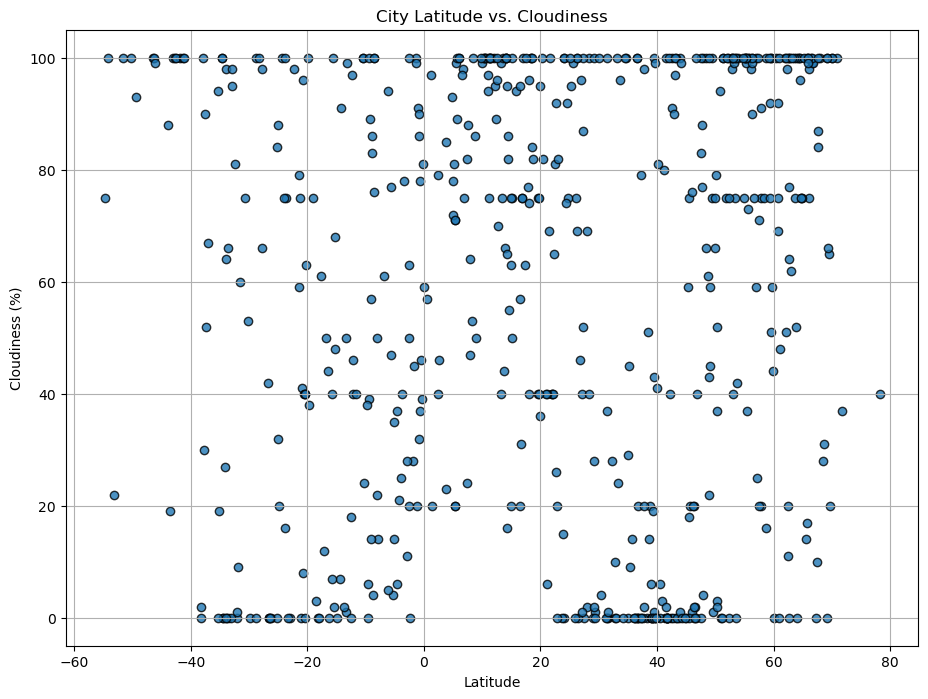

In [42]:
import matplotlib.pyplot as plt


# Create scatter plot for latitude vs. cloudiness
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

fig, ax = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

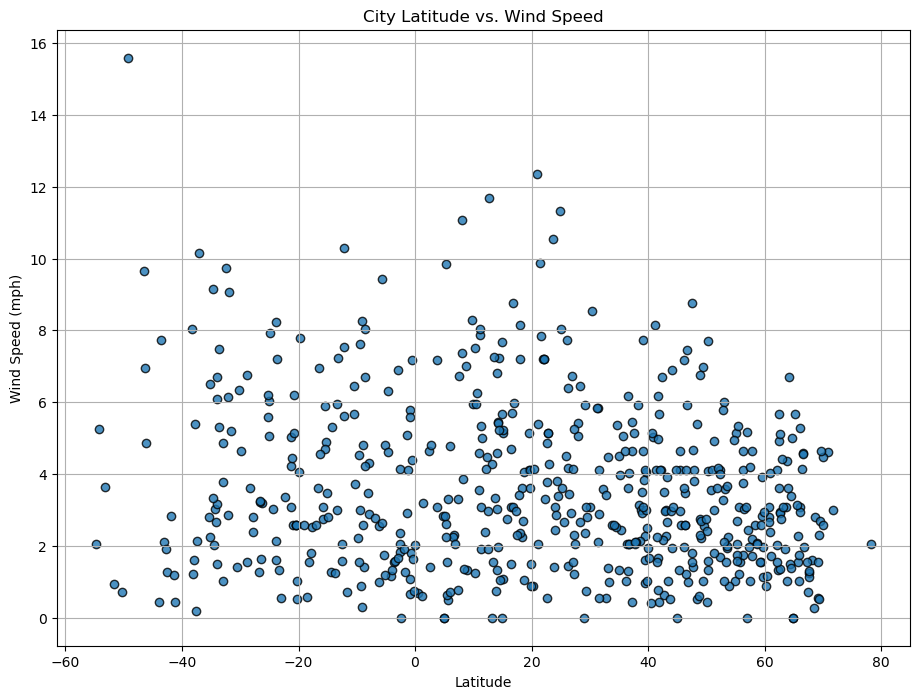

In [43]:
import matplotlib.pyplot as plt

# Create scatter plot for latitude vs. wind speed
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

fig, ax = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")

# Show the plot
plt.show()


In [44]:
## Requirement 2: Compute Linear Regression for Each Relationship

In [45]:

# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [46]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]

northern_hemi_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,lompoc,34.6391,-120.4579,20.08,87,100,5.36,US,1690427813
6,longyearbyen,78.2186,15.6401,10.91,71,40,2.06,SJ,1690427984
7,sandnessjoen,66.0217,12.6316,14.12,94,75,3.09,NO,1690427985
8,stanley,54.8680,-1.6985,13.49,92,75,1.03,GB,1690427985
9,yemva,62.5900,50.8594,17.02,66,100,2.94,RU,1690427989


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern_hemi_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,13.18,69,100,2.12,AU,1690427982
2,saint-joseph,-21.3667,55.6167,18.21,81,79,4.21,RE,1690427983
3,san antonio de pale,-1.4014,5.6325,22.84,90,100,5.08,GQ,1690427983
4,waitangi,-43.9535,-176.5597,8.23,90,88,0.45,NZ,1690427984
5,hithadhoo,-0.6000,73.0833,28.31,78,37,7.18,MV,1690427984


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3973775017939164
The correlation between both factors is -0.63


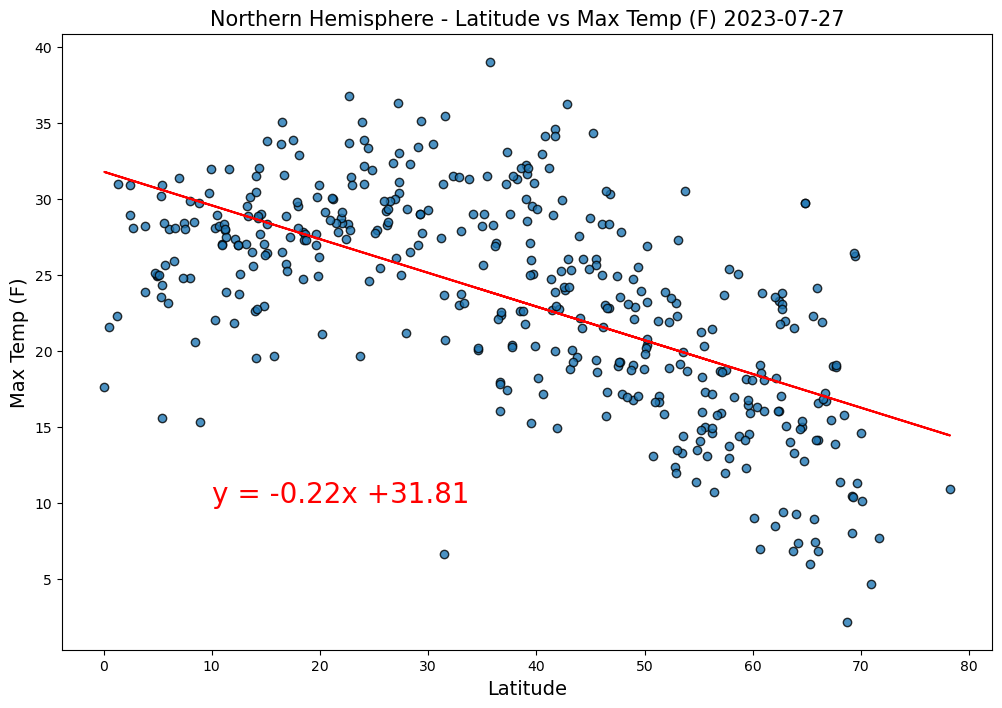

In [48]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.5868127980900204
The correlation between both factors is 0.77


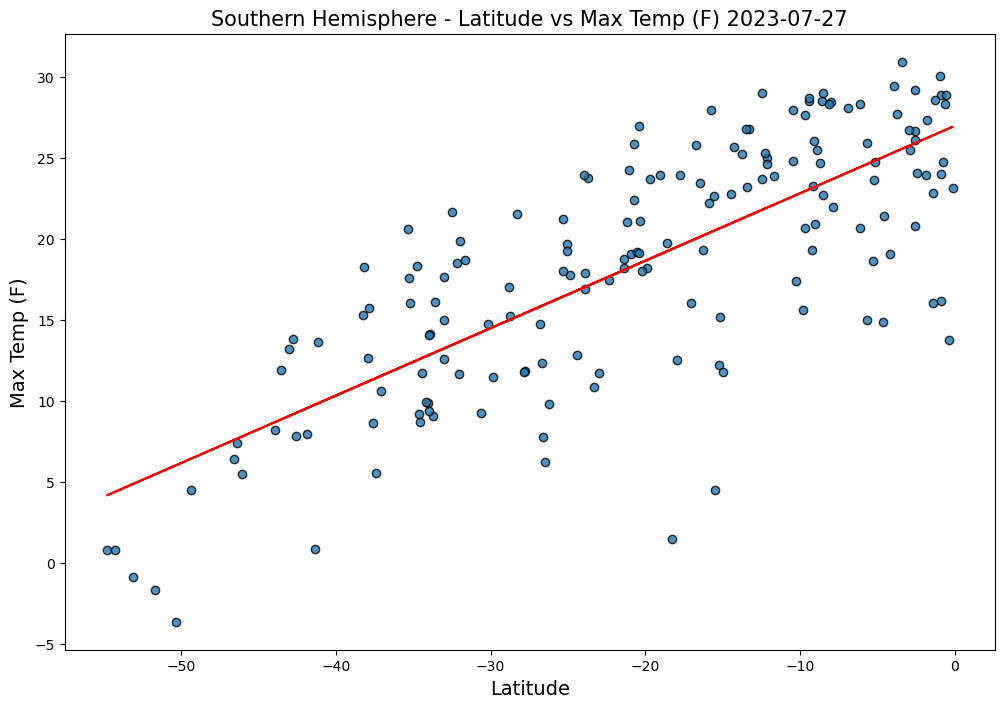

In [49]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df["Lat"]
y_values = southern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("./output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0004350217502455023
The correlation between both factors is 0.02


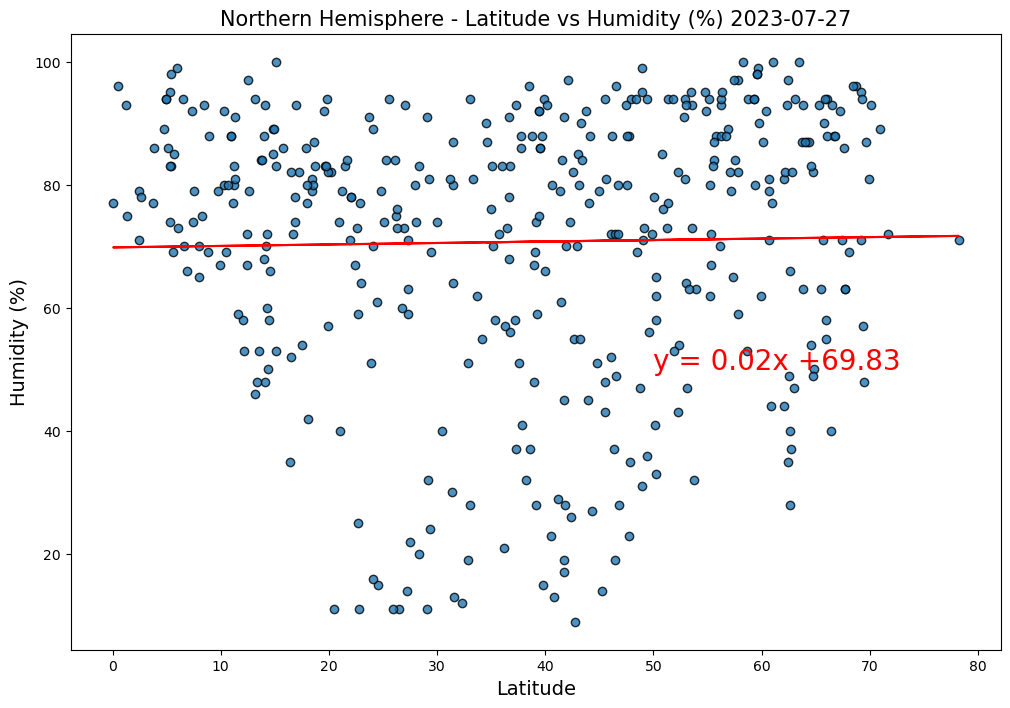

In [50]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.0019844445181358577
The correlation between both factors is 0.04


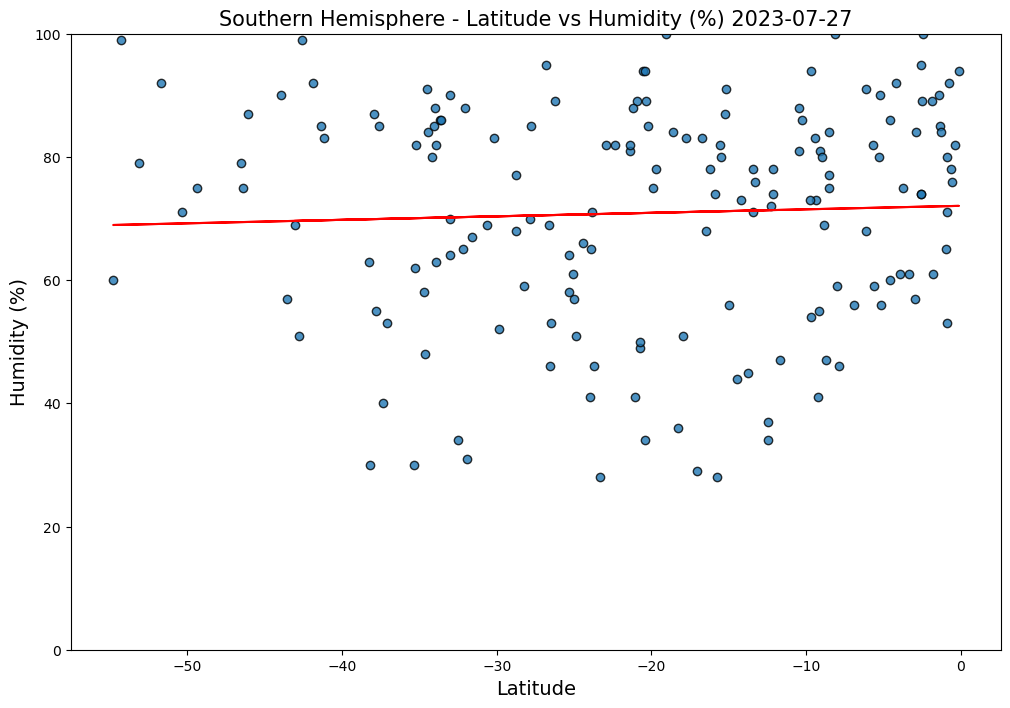

In [64]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0007482284627489325
The correlation between both factors is -0.03


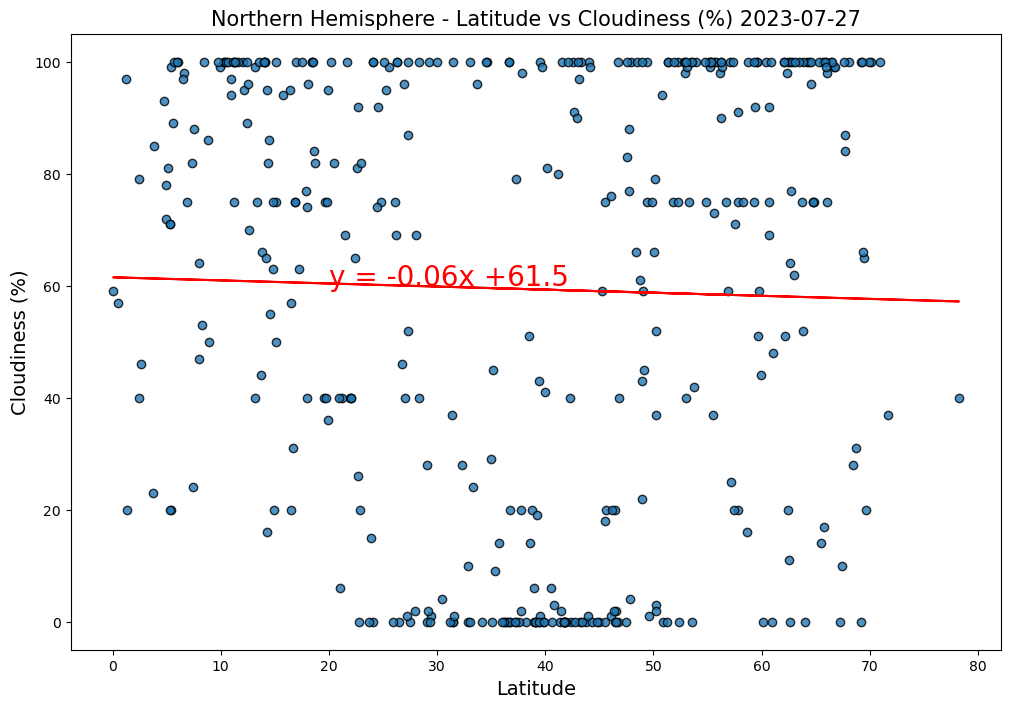

In [52]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.026317567348659445
The correlation between both factors is -0.16


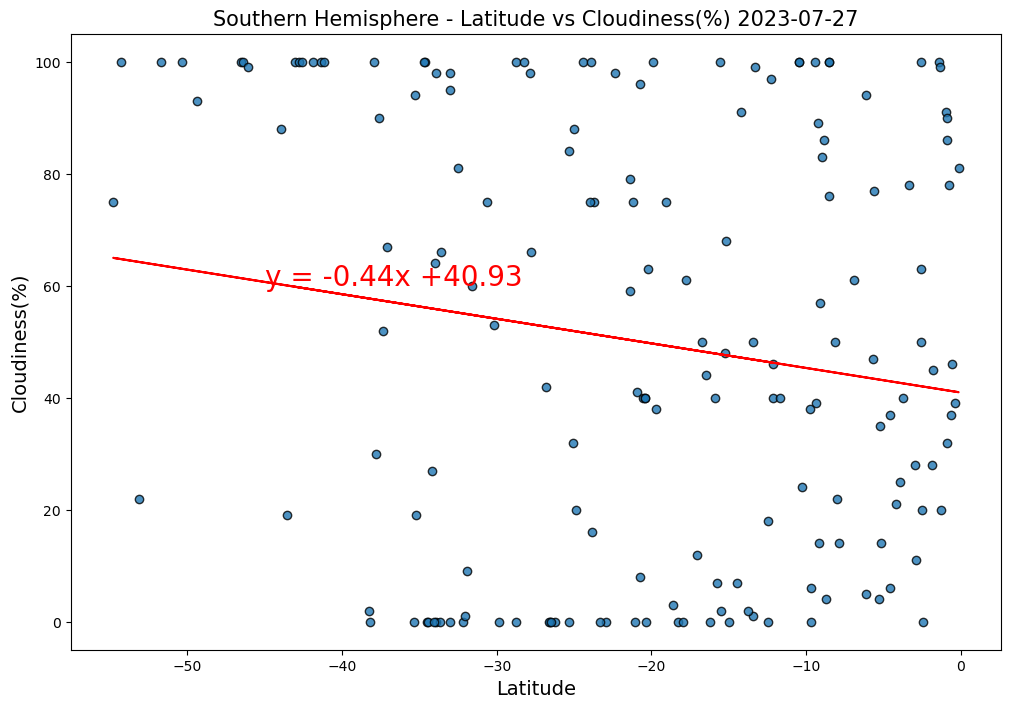

In [53]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.049770915487519024
The correlation between both factors is -0.22


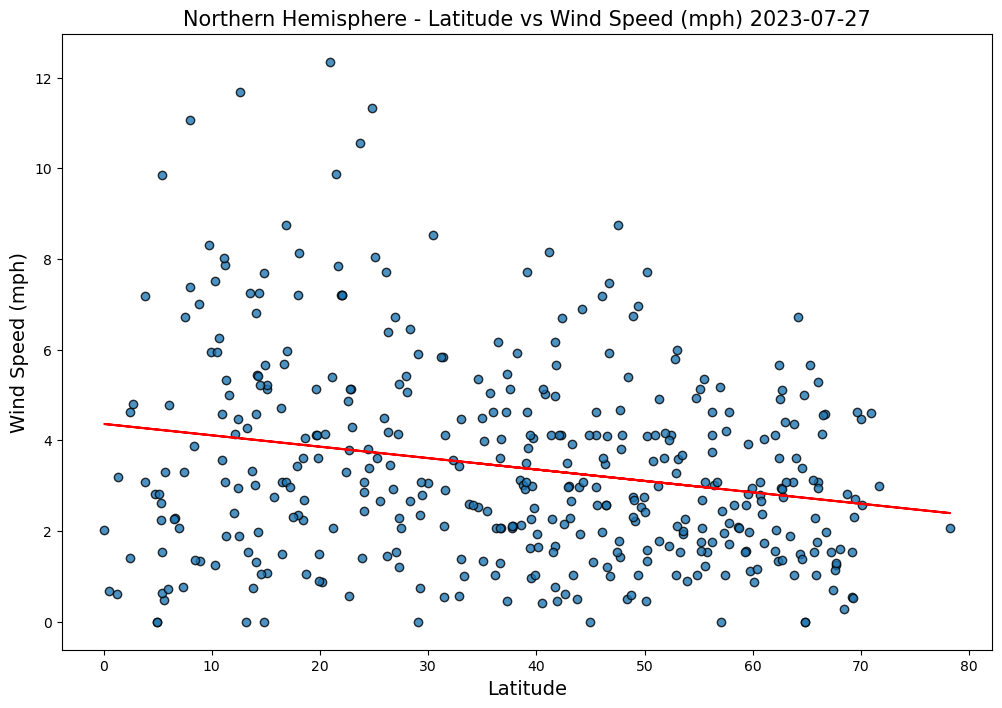

In [54]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.01654579182605938
The correlation between both factors is -0.13


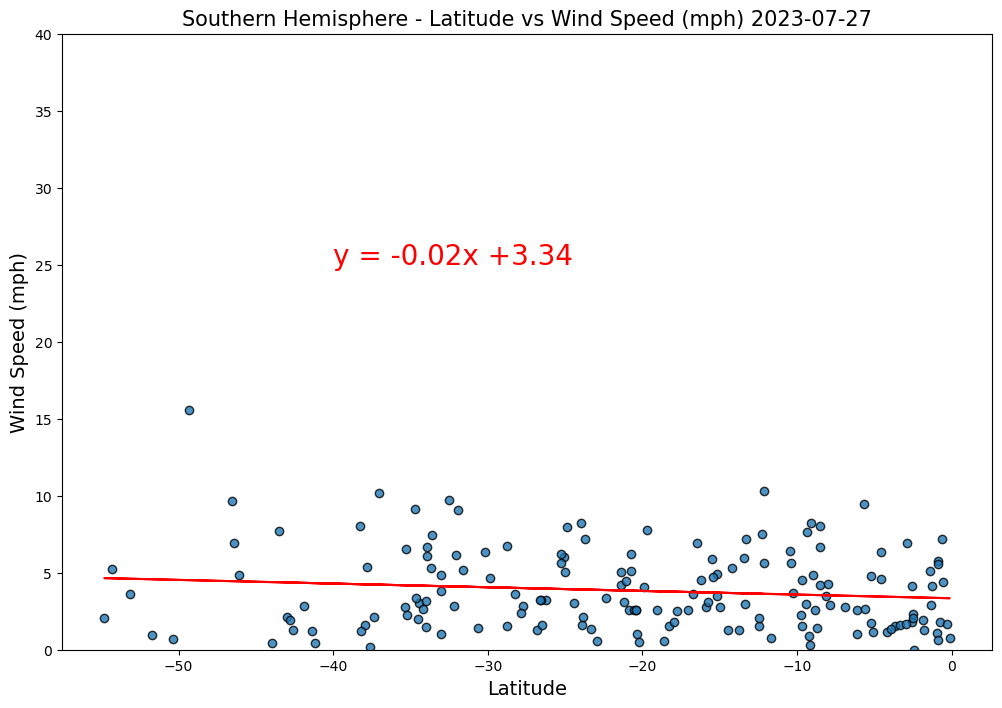

In [55]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE